In [10]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn import datasets

In [11]:
%matplotlib inline

In [12]:
diabetes = datasets.load_diabetes()
data, target = diabetes.data, diabetes.target
num_insts, num_attrs = data.shape
augmented_data = np.ones((num_insts, num_attrs + 1))
num_attrs += 1
augmented_data[:, :-1] = data
data = augmented_data
idx = np.arange(num_insts)
np.random.shuffle(idx)
num_train = int(0.7 * num_insts)
data, target = data[idx], target[idx]
data_train, target_train = data[:num_train], target[:num_train]
data_test, target_test = data[num_train:], target[num_train:]
print("Number of training data: {}".format(num_train))
print("Number of test data: {}".format(num_insts - num_train))
print("Number of attributes: {}".format(data.shape[1]))

Number of training data: 309
Number of test data: 133
Number of attributes: 11


In [31]:
# Method 1, implement the gradient descent algorithm
w = np.zeros(num_attrs)

## Please implement your gradient descent method here.
## Stop condition: ||gradient|| <= eps || num_iters > 5000
eps = 1e-3
max_iters = 5000
train_losses, train_gradients = np.zeros(max_iters), np.zeros(max_iters)
num_iters = 0
start_time = time.time()

x, y = data_train, target_train
w = np.ones(num_attrs)

learning_rate = 0.05
cost = eps + 1

## Your code here, remember:
## 1. You should record your training loss in each iteration
## 2. You should record your gradient norm in each iteration
## 3. Remember that even for convex functions, if step_size/learning_rate is too larget, then it can diverge.

while num_iters < max_iters and cost > eps:
    predictions = x.dot(w)
    gradient = x.T.dot(predictions - y)
    w = w - 1/num_attrs * learning_rate * gradient
    gradient_norm = np.linalg.norm(gradient)
    train_losses[num_iters] = 1/2/num_attrs * np.sum(np.square(x.dot(w) - y))
    train_gradients[num_iters] = gradient_norm
    num_iters = num_iters + 1


end_time = time.time()
print("Time elapsed for training: {} seconds.".format(end_time - start_time))

Time elapsed for training: 0.19022607803344727 seconds.


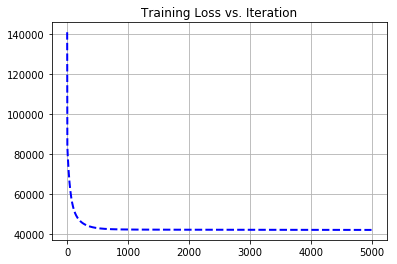

In [32]:
## Plot training losses
plt.figure()
plt.plot(np.arange(num_iters), train_losses[:num_iters], "b--", linewidth=2)
plt.grid(True)
plt.title("Training Loss vs. Iteration")
plt.show()

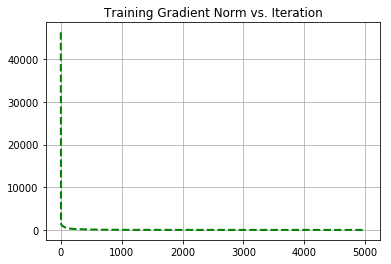

In [6]:
## Plot training gradient norms
plt.figure()
plt.plot(np.arange(num_iters), train_gradients[:num_iters], "g--", linewidth=2)
plt.grid(True)
plt.title("Training Gradient Norm vs. Iteration")
plt.show()

In [7]:
## Check the value of final weight vector w
print(w)

## Use the obtained w for prediction, record the test error.
preds = np.dot(data_test, w)
mse_test = np.mean((preds - target_test) ** 2)
print("Average test error: {}.".format(mse_test))

[  32.54117591 -249.23384591  480.36545701  256.88383719 -129.1889158
   15.50112559 -237.69146073   42.5638576   535.73529444   38.38111946
  152.72908524]
Average test error: 3172.0017960677474.


In [8]:
# Method 2, implement the closed-form solution
start_time = time.time()
x_trans = x.T
x_pinv = np.dot(np.linalg.inv(np.dot(x_trans,x)), x_trans)
w = np.dot(x_pinv, y)
end_time = time.time()
print("Time elapsed: {} seconds.".format(end_time - start_time))
print(w)

Time elapsed: 0.01026296615600586 seconds.
[  25.16717319 -256.6363254   462.06704144  261.43803977 -916.97484325
  662.38787428   79.65586746   99.42796774  852.10305021   33.01536287
  152.68950784]


In [9]:
## Use the obtained w for prediction, record the test error.
preds = np.dot(data_test, w)
mse_test = np.mean((preds - target_test) ** 2)
print("Average test error: {}.".format(mse_test))

Average test error: 3193.310640841931.


In [27]:
## Check whether two results are consistent? Why??